In [2]:
from google.colab import drive
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import seaborn as sns

In [147]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
!ls '/content/gdrive/MyDrive/datasets'

current_app.csv


In [6]:
df = pd.read_csv('/content/gdrive/MyDrive/datasets/current_app.csv')

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer 
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 

from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, silhouette_score
from sklearn.decomposition import FastICA, PCA 

from sklearn.cluster import KMeans 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree


import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm
import time

In [34]:
df = pd.read_csv('/content/gdrive/MyDrive/datasets/current_app.csv')
#df = pd.read_csv("current_app.csv")
df = df.drop('SK_ID_CURR', axis = 1)


In [148]:
df.head()

,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
data1 = df.copy()

In [37]:
# I will remove columns in steps in case you want to keep some of the groups

In [38]:
# dropping columns - apartment/house features
data1 = df.drop(['APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG',
       'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI',
       'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'
       ], axis=1)

In [39]:
# dropping columns - coded FLAGS features
data1 = data1.drop(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       ], axis=1)

In [40]:
# dropping columns - flags for contact information
"""data1 = data1.drop(['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL'
       ], axis=1)"""

"data1 = data1.drop(['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',\n       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL'\n       ], axis=1)"

In [41]:
# I will also drop the columns that doesnt't make sense
data1 = data1.drop(['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START'
       ], axis=1)

In [42]:
data1.shape

(307511, 52)

In [43]:
# dropping columns
data1 = data1.drop(['OWN_CAR_AGE'
       ], axis=1)

In [44]:
data1.OCCUPATION_TYPE.isnull().sum()

96391

In [45]:
# I will also drop OCCUPATION_TYPE because too many missing values
data1 = data1.drop(['OCCUPATION_TYPE'
       ], axis=1)

In [46]:
data1.shape

(307511, 50)

In [47]:
# select the first 39 columns from dataset
filtered = data1.copy()

filtered.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_

In [48]:
filtered.shape

(307511, 50)

In [49]:
# extract columns names with numeric data.
numeric_vars = filtered.select_dtypes(include=np.number).columns.tolist() 

filtered[numeric_vars]=filtered[numeric_vars].fillna(filtered[numeric_vars].median())

In [50]:
cat_vars = [var for var in filtered.columns if var in ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                                                       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                                                       'NAME_TYPE_SUITE', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START',
                                                       'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'ORGANIZATION_TYPE'
                                                      ]]
for var in cat_vars:
    df = pd.get_dummies(filtered[var], prefix = var, drop_first = True) 
    filtered = pd.concat([filtered, df], axis = 1)
    del filtered[var] 

In [51]:
filtered.shape

(307511, 129)

In [53]:
x = filtered.drop(['TARGET'], axis = 1)
y = filtered['TARGET']

In [54]:
columns = x.columns

In [55]:
# oversample = SMOTE()
# x, y = oversample.fit_resample(x, y)

In [58]:
x_train.shape

(215257, 128)

In [57]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [59]:
x_train.dtypes

CNT_CHILDREN                                           int64
AMT_INCOME_TOTAL                                     float64
AMT_CREDIT                                           float64
AMT_ANNUITY                                          float64
AMT_GOODS_PRICE                                      float64
REGION_POPULATION_RELATIVE                           float64
DAYS_BIRTH                                             int64
DAYS_EMPLOYED                                          int64
DAYS_REGISTRATION                                    float64
DAYS_ID_PUBLISH                                        int64
FLAG_MOBIL                                             int64
FLAG_EMP_PHONE                                         int64
FLAG_WORK_PHONE                                        int64
FLAG_CONT_MOBILE                                       int64
FLAG_PHONE                                             int64
FLAG_EMAIL                                             int64
CNT_FAM_MEMBERS         

# Logistic Regression

In [93]:
# standardize the columns in train/validation datasets
for field in x_train.columns:
    standard_dev = x_train[field].std()
    mean = x_train[field].mean()
    
    x_train[field] = (x_train[field] - mean) / standard_dev
    x_valid[field] = (x_valid[field] - mean) / standard_dev

In [94]:
# fit logistic model
logit_model = LogisticRegression(random_state=0).fit(x_train, y_train)

# predict target from x_train/x_val dataset
y_train_pred = logit_model.predict(x_train)
y_val_pred = logit_model.predict(x_valid)

# calculate accuracy in train and validation dataset
print('accuracy in train dataset: ', metrics.accuracy_score(y_train, y_train_pred))
print('accuracy in validation dataset: ',metrics.accuracy_score(y_valid, y_val_pred))

# precision in train and validation dataset
print('precision in train dataset: ', metrics.precision_score(y_train, y_train_pred))
print('precision in validation dataset: ', metrics.precision_score(y_valid, y_val_pred))

# recall in train and validation dataset
print('recall in train dataset: ', metrics.recall_score(y_train, y_train_pred))
print('recall in validation dataset: ', metrics.recall_score(y_valid, y_val_pred))

# AUC
y_train_prob = logit_model.predict_proba(x_train)
y_val_prob = logit_model.predict_proba(x_valid)

# AUC in train and validation dataset
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_prob[:,1], pos_label = 1)
print('AUC in train dataset: ', metrics.auc(fpr, tpr))
fpr, tpr, thresholds = metrics.roc_curve(y_valid, y_val_prob[:,1], pos_label = 1)
print('AUC in validation dataset: ', metrics.auc(fpr, tpr))

accuracy in train dataset:  0.9191571005820949
accuracy in validation dataset:  0.9194289678496326
precision in train dataset:  0.5125628140703518
precision in validation dataset:  0.44680851063829785
recall in train dataset:  0.01171605789110958
recall in validation dataset:  0.0113314447592068
AUC in train dataset:  0.7458943450157413
AUC in validation dataset:  0.7446268337439768


In [ ]:
# map coefficient for each variable
{col_name : coef for col_name, coef in zip(x_train.columns, logit_model.coef_[0])}

# Decision Tree

In [67]:
# Re-initiating training data as Trees don't need standardized data
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [68]:
# # Used grid search / cross-validation to find the optimal set of parameters
# parameters = {"max_depth":range(2, 8), "min_samples_leaf": range(5, 55, 5), "min_samples_split": range(10, 110, 5)}

# clf = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=4, scoring = "roc_auc", verbose=4)
# clf.fit(x_train, y_train)

# # best parameters
# clf.best_estimator_

# DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=95)

In [69]:
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=95, min_samples_leaf=10)
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=95,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [70]:
y_train_pred = clf.predict(x_train)
y_val_pred = clf.predict(x_valid)
y_train_prob = clf.predict_proba(x_train)
y_val_prob = clf.predict_proba(x_valid)
print("Training accuracy: ", metrics.accuracy_score(y_train, y_train_pred))
print("Validation accuracy: ", metrics.accuracy_score(y_valid, y_val_pred))
print("\n")
print("Training precision: ", metrics.precision_score(y_train, y_train_pred))
print("Validation precision: ", metrics.precision_score(y_train, y_train_pred))
print("\n")
print("Training recall: ", metrics.recall_score(y_train, y_train_pred))
print("Validation recall: ", metrics.recall_score(y_train, y_train_pred))
print("\n")
# auc
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_prob[:,1], pos_label = 1)
print("Training AUC", metrics.auc(fpr, tpr))
fpr, tpr, thresholds = metrics.roc_curve(y_valid, y_val_prob[:,1], pos_label = 1)
print("Validation AUC", metrics.auc(fpr, tpr))

Training accuracy:  0.9191199357047622
Validation accuracy:  0.9196674398942051


Training precision:  0.6
Validation precision:  0.6


Training recall:  0.00034458993797381116
Validation recall:  0.00034458993797381116


Training AUC 0.7115133274390157
Validation AUC 0.7067877757314385


In [71]:
# print out feature importance
imp = pd.DataFrame()

imp["var"] = x_train.columns
imp["imp"] = clf.feature_importances_

# sort the data frame by the feature importances in descending order - most important features at the top
imp = imp.sort_values("imp", ascending = False).reset_index(drop = True)

# print out the data frame with imp greater than 0
imp[imp['imp']>0]

,var,imp
0,EXT_SOURCE_3,0.479930
1,EXT_SOURCE_2,0.417819
2,EXT_SOURCE_1,0.057035
3,CODE_GENDER_M,0.031390
4,AMT_ANNUITY,0.004260
5,AMT_CREDIT,0.003518
6,REGION_RATING_CLIENT_W_CITY,0.003067
7,NAME_CONTRACT_TYPE_Revolving loans,0.002981


# XGBoost Model

In [ ]:
# parameters = {
#         'max_depth': range(2, 6),
#         'n_estimators': [50, 100, 150, 200, 250, 300],
#         'subsample': [0.6, 0.7, 0.8],
#         'colsample_bytree': [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 1],
#         'colsample_bynode': [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 1],
#         'gamma': [0, 5, 10, 15, 20],
#         'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
#         'lambda': [0.1, 0.25, 0.5, 0.75, 1]
# }

# start = time.time() 

# clf = RandomizedSearchCV(xgb.XGBClassifier(use_label_encoder = False, eval_metric = "logloss"), 
#                          parameters, n_jobs=4, scoring = "roc_auc", n_iter = 120,
#                          random_state = 123)

# clf.fit(X_train, y_train)

# end = time.time()

# # print the number of seconds it takes to run the hyperparameter search
# print("Total time in seconds ==> ", end - start)
#clf.best_params_
# {'subsample': 0.6,
#  'n_estimators': 200,
#  'max_depth': 5,
#  'learning_rate': 0.3,
#  'lambda': 1,
#  'gamma': 0,
#  'colsample_bytree': 0.8,
#  'colsample_bynode': 1}

In [84]:
# Parameters calcualted using the randomized search above
clf =xgb.XGBClassifier(use_label_encoder = False, eval_metric = "logloss",
                                    subsample= 0.6, n_estimators= 200, max_depth= 5, 
                                    learning_rate= 0.3,gamma= 0, colsample_bytree= 0.8, 
                                    colsample_bynode= 1,reg_lambda=1)

In [85]:
clf.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, eval_metric='logloss',
              gamma=0, learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, use_label_encoder=False, verbosity=1)

In [86]:
imp = pd.DataFrame()

# add a column for the variable names
imp["var"] = x_train.columns

# add a column with the feature importances
imp["imp"] = clf.feature_importances_

# sort the data frame by the feature importances in descending order - most important features at the top
imp = imp.sort_values("imp", ascending = False).reset_index(drop = True)

# print out the data frame
imp

,var,imp
0,EXT_SOURCE_3,0.024570
1,NAME_EDUCATION_TYPE_Higher education,0.020021
2,EXT_SOURCE_2,0.019671
3,FLAG_OWN_CAR_Y,0.018347
4,CODE_GENDER_M,0.017735
5,NAME_INCOME_TYPE_Working,0.017134
6,ORGANIZATION_TYPE_Transport: type 3,0.016081
7,NAME_CONTRACT_TYPE_Revolving loans,0.015961
8,NAME_EDUCATION_TYPE_Secondary / secondary special,0.015614
9,ORGANIZATION_TYPE_Trade: type 3,0.014915


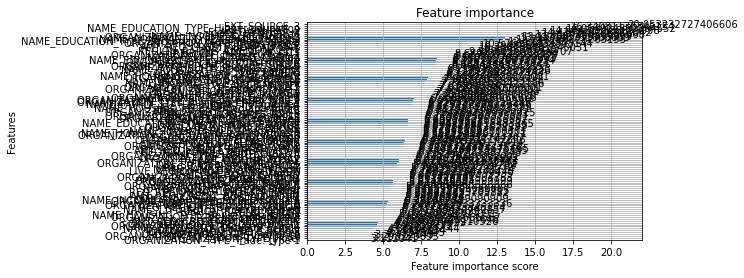

In [87]:
xgb.plot_importance(clf, importance_type = "gain", xlabel = "Feature importance score")

In [88]:
train_pred = clf.predict(x_train)
val_pred = clf.predict(x_valid)

In [90]:
print("Training recall: ", metrics.recall_score(y_train, train_pred))
print("Validation recall: ", metrics.recall_score(y_valid, val_pred))

print("\n")

print("Training precision: ", metrics.precision_score(y_train, train_pred))
print("Validation precision: ", metrics.precision_score(y_valid, val_pred))

print("\n")

print("Training accuracy: ", metrics.accuracy_score(y_train, train_pred))
print("Validation accuracy: ", metrics.accuracy_score(y_valid, val_pred))

print("\n")

y_train_prob = clf.predict_proba(x_train)
y_val_prob = clf.predict_proba(x_valid)

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_prob[:,1], pos_label = 1)
print("Training AUC: ", metrics.auc(fpr, tpr))

fpr, tpr, thresholds = metrics.roc_curve(y_valid, y_val_prob[:,1], pos_label = 1)
print("Validation AUC: ", metrics.auc(fpr, tpr))

Training recall:  0.0855731679301631
Validation recall:  0.04451639012545528


Training precision:  0.7621483375959079
Validation precision:  0.4465493910690122


Training accuracy:  0.9238723943936783
Validation accuracy:  0.9187894291846423


Training AUC:  0.8435066218355758
Validation AUC:  0.7441292460559128


# Random Forest

In [95]:
# Used grid for hyperparameters tuning
# parameters = {"max_depth":range(2, 8), "min_samples_leaf": range(5, 100, 5), "min_samples_split": range(10, 550, 5),
#               "max_samples":[0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4], "max_features": [5, 10, 20, 25, 30],
#               "n_estimators": [100, 150, 200, 250, 300, 350, 400]}

# clf = RandomizedSearchCV(RandomForestClassifier(), parameters, n_jobs=4, scoring = "roc_auc", n_iter = 200,
#                         random_state = 0)

# clf.fit(x_train, y_train)

In [96]:
#clf.best_params_
# Best Parameters:
# {'n_estimators': 400,
#'min_samples_split': 520,
# 'min_samples_leaf': 55,
# 'max_samples': 0.3,
# 'max_features': 5,
# 'max_depth': 7}

In [97]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [102]:
clf1 = RandomForestClassifier(n_estimators=400,min_samples_split=520,min_samples_leaf=55,max_samples=0.3, max_features=5, max_depth=7, n_jobs=4)

In [103]:
clf1.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features=5,
                       max_leaf_nodes=None, max_samples=0.3,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=55, min_samples_split=520,
                       min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [104]:
train_pred = clf1.predict(x_train)
val_pred = clf1.predict(x_valid)

In [105]:
print("Training recall: ", metrics.recall_score(y_train, train_pred))
print("Validation recall: ", metrics.recall_score(y_valid, val_pred))

print("\n")

print("Training precision: ", metrics.precision_score(y_train, train_pred))
print("Validation precision: ", metrics.precision_score(y_valid, val_pred))

print("\n")

print("Training accuracy: ", metrics.accuracy_score(y_train, train_pred))
print("Validation accuracy: ", metrics.accuracy_score(y_valid, val_pred))

print("\n")

y_train_prob = clf.predict_proba(x_train)
y_val_prob = clf.predict_proba(x_valid)

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_prob[:,1], pos_label = 1)
print("Training AUC: ", metrics.auc(fpr, tpr))

fpr, tpr, thresholds = metrics.roc_curve(y_valid, y_val_prob[:,1], pos_label = 1)
print("Validation AUC: ", metrics.auc(fpr, tpr))

Training recall:  0.0
Validation recall:  0.0


Training precision:  0.0
Validation precision:  0.0


Training accuracy:  0.919110644485429
Validation accuracy:  0.9196457606174258


Training AUC:  0.7316822207482268
Validation AUC:  0.7244330155913508


# Neural Network

In [106]:
import tensorflow as tf
from tensorflow import keras

In [107]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scale=scaler.fit_transform(x)
X_scale.shape

(307511, 128)

In [108]:
train_X_nn, valid_X_nn, train_y_nn, valid_y_nn = train_test_split(X_scale, y, test_size=0.3, random_state=1)

In [109]:
model1 = tf.keras.Sequential([ tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(units=1,activation=tf.nn.sigmoid)])

In [110]:
model1.compile(optimizer= tf.optimizers.Adam(),
              loss = tf.losses.binary_crossentropy,
              metrics = ['accuracy'])

In [111]:
model1.fit(train_X_nn, train_y_nn, epochs = 15)

Epoch 1/15
6727/6727 [==============================] - 11s 2ms/step - loss: 0.2632 - accuracy: 0.9184
Epoch 2/15
6727/6727 [==============================] - 11s 2ms/step - loss: 0.2532 - accuracy: 0.9191
Epoch 3/15
6727/6727 [==============================] - 11s 2ms/step - loss: 0.2514 - accuracy: 0.9189
Epoch 4/15
6727/6727 [==============================] - 11s 2ms/step - loss: 0.2499 - accuracy: 0.9199
Epoch 5/15
6727/6727 [==============================] - 11s 2ms/step - loss: 0.2520 - accuracy: 0.9188
Epoch 6/15
6727/6727 [==============================] - 11s 2ms/step - loss: 0.2496 - accuracy: 0.9198
Epoch 7/15
6727/6727 [==============================] - 11s 2ms/step - loss: 0.2483 - accuracy: 0.9198
Epoch 8/15
6727/6727 [==============================] - 11s 2ms/step - loss: 0.2488 - accuracy: 0.9194
Epoch 9/15
6727/6727 [==============================] - 11s 2ms/step - loss: 0.2463 - accuracy: 0.9198
Epoch 10/15
6727/6727 [==============================] - 11s 2ms/step - l

In [112]:
model1.evaluate(valid_X_nn, valid_y_nn)

2883/2883 [==============================] - 3s 1ms/step - loss: 0.2554 - accuracy: 0.9189


[0.25540891289711, 0.9188761711120605]

In [113]:
y_pred_valid = model1.predict(valid_X_nn).ravel()
y_pred = model1.predict(train_X_nn).ravel()

In [114]:

from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,roc_auc_score,classification_report, confusion_matrix
# predict probabilities for test set
prediction_probs = model1.predict(valid_X_nn)
# predict classes
nn_prediction_train = (model1.predict(train_X_nn) > 0.5).astype("int32")
nn_prediction_valid = (model1.predict(valid_X_nn) > 0.5).astype("int32")

print("Accuracy on train is:",accuracy_score(train_y_nn,nn_prediction_train))
print("Accuracy on test is:",accuracy_score(valid_y_nn,nn_prediction_valid))
print("Precision_score train is:",precision_score(train_y_nn,nn_prediction_train))
print("Precision_score on test is:",precision_score(valid_y_nn,nn_prediction_valid))
print("Recall_score on train is:",recall_score(train_y_nn,nn_prediction_train))
print("Recall_score on test is:",recall_score(valid_y_nn,nn_prediction_valid))
print("f1_score on train is:",f1_score(train_y_nn,nn_prediction_train))
print("f1_score on test is:",f1_score(valid_y_nn,nn_prediction_valid))

Accuracy on train is: 0.9197889034967504
Accuracy on test is: 0.9188761462917597
Precision_score train is: 0.6900826446280992
Precision_score on test is: 0.3950617283950617
Recall_score on train is: 0.009620924069593272
Recall_score on test is: 0.0042855229677246556
f1_score on train is: 0.018977272727272728
f1_score on test is: 0.008479067302596715


In [115]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(train_y_nn, y_pred)
print("NeuralNetworks Train: ",str(auc(fpr, tpr)))
#fpr, tpr, thresholds = roc_curve(valid_y,nn_prediction_valid)
fpr, tpr, thresholds = roc_curve(valid_y_nn, y_pred_valid)
print("NeuralNetworkss Valid: ",str(auc(fpr, tpr)),"\n")

NeuralNetworks Train:  0.7675668838468075
NeuralNetworkss Valid:  0.7365149736592707 



# SMOTE Testing

In [118]:
from imblearn.over_sampling import SMOTE

In [119]:
x = filtered.drop(['TARGET'], axis = 1)
y = filtered['TARGET']

In [120]:
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [121]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [122]:
x_train.shape

(395760, 128)

# Logistic Regression with SMOTE

In [123]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_valid=scaler.fit_transform(x_valid)
x_train.shape

(395760, 128)

In [124]:
# fit logistic model
logit_model = LogisticRegression(random_state=0).fit(x_train, y_train)

# predict target from x_train/x_val dataset
y_train_pred = logit_model.predict(x_train)
y_val_pred = logit_model.predict(x_valid)

# calculate accuracy in train and validation dataset
print('accuracy in train dataset: ', metrics.accuracy_score(y_train, y_train_pred))
print('accuracy in validation dataset: ',metrics.accuracy_score(y_valid, y_val_pred))

# precision in train and validation dataset
print('precision in train dataset: ', metrics.precision_score(y_train, y_train_pred))
print('precision in validation dataset: ', metrics.precision_score(y_valid, y_val_pred))

# recall in train and validation dataset
print('recall in train dataset: ', metrics.recall_score(y_train, y_train_pred))
print('recall in validation dataset: ', metrics.recall_score(y_valid, y_val_pred))

# AUC
y_train_prob = logit_model.predict_proba(x_train)
y_val_prob = logit_model.predict_proba(x_valid)

# AUC in train and validation dataset
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_prob[:,1], pos_label = 1)
print('AUC in train dataset: ', metrics.auc(fpr, tpr))
fpr, tpr, thresholds = metrics.roc_curve(y_valid, y_val_prob[:,1], pos_label = 1)
print('AUC in validation dataset: ', metrics.auc(fpr, tpr))

accuracy in train dataset:  0.6977385284010511
accuracy in validation dataset:  0.6526778765653374
precision in train dataset:  0.6964965115695427
precision in validation dataset:  0.7476012640045964
recall in train dataset:  0.7011100500709886
recall in validation dataset:  0.4605093963452759
AUC in train dataset:  0.7638834875081868
AUC in validation dataset:  0.7608313958490298


# Decision Tree SMOTE

In [ ]:
x = filtered.drop(['TARGET'], axis = 1)
y = filtered['TARGET']

In [ ]:
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [128]:
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=95, min_samples_leaf=10)
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=95,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [129]:
y_train_pred = clf.predict(x_train)
y_val_pred = clf.predict(x_valid)
y_train_prob = clf.predict_proba(x_train)
y_val_prob = clf.predict_proba(x_valid)
print("Training accuracy: ", metrics.accuracy_score(y_train, y_train_pred))
print("Validation accuracy: ", metrics.accuracy_score(y_valid, y_val_pred))
print("\n")
print("Training precision: ", metrics.precision_score(y_train, y_train_pred))
print("Validation precision: ", metrics.precision_score(y_train, y_train_pred))
print("\n")
print("Training recall: ", metrics.recall_score(y_train, y_train_pred))
print("Validation recall: ", metrics.recall_score(y_train, y_train_pred))
print("\n")
# auc
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_prob[:,1], pos_label = 1)
print("Training AUC", metrics.auc(fpr, tpr))
fpr, tpr, thresholds = metrics.roc_curve(y_valid, y_val_prob[:,1], pos_label = 1)
print("Validation AUC", metrics.auc(fpr, tpr))

Training accuracy:  0.809760966242167
Validation accuracy:  0.8112810414357474


Training precision:  0.8109185318905104
Validation precision:  0.8109185318905104


Training recall:  0.8079972109802495
Validation recall:  0.8079972109802495


Training AUC 0.8902077119295421
Validation AUC 0.890833804972335


# XGBoost SMOTE

In [130]:
# Parameters calcualted using the randomized search above
clf2 =xgb.XGBClassifier(use_label_encoder = False, eval_metric = "logloss",
                                    subsample= 0.6, n_estimators= 200, max_depth= 5, 
                                    learning_rate= 0.3,gamma= 0, colsample_bytree= 0.8, 
                                    colsample_bynode= 1,reg_lambda=1)

In [131]:
clf2.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, eval_metric='logloss',
              gamma=0, learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, use_label_encoder=False, verbosity=1)

In [132]:
train_pred = clf2.predict(x_train)
val_pred = clf2.predict(x_valid)

In [133]:

print("Training accuracy: ", metrics.accuracy_score(y_train, train_pred))
print("Validation accuracy: ", metrics.accuracy_score(y_valid, val_pred), '\n')

print("Training recall: ", metrics.recall_score(y_train, train_pred))
print("Validation recall: ", metrics.recall_score(y_valid, val_pred))

print("\n")

print("Training precision: ", metrics.precision_score(y_train, train_pred))
print("Validation precision: ", metrics.precision_score(y_valid, val_pred))

print("\n")


print("\n")

y_train_prob = clf.predict_proba(x_train)
y_val_prob = clf.predict_proba(x_valid)

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_prob[:,1], pos_label = 1)
print("Training AUC: ", metrics.auc(fpr, tpr))

fpr, tpr, thresholds = metrics.roc_curve(y_valid, y_val_prob[:,1], pos_label = 1)
print("Validation AUC: ", metrics.auc(fpr, tpr))

Training accuracy:  0.9577546998180716
Validation accuracy:  0.9554276820036318 

Training recall:  0.9179512831006624
Validation recall:  0.9152972265150353


Training precision:  0.997364953886693
Validation precision:  0.9951261431118293




Training AUC:  0.8902077119295421
Validation AUC:  0.890833804972335


# Random Forest SMOTE

In [134]:
clf3 = RandomForestClassifier(n_estimators=400,min_samples_split=520,min_samples_leaf=55,max_samples=0.3, max_features=5, max_depth=7, n_jobs=4)

In [135]:
clf3.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features=5,
                       max_leaf_nodes=None, max_samples=0.3,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=55, min_samples_split=520,
                       min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [136]:
train_pred = clf3.predict(x_train)
val_pred = clf3.predict(x_valid)

In [137]:
print("Training recall: ", metrics.recall_score(y_train, train_pred))
print("Validation recall: ", metrics.recall_score(y_valid, val_pred))

print("\n")

print("Training precision: ", metrics.precision_score(y_train, train_pred))
print("Validation precision: ", metrics.precision_score(y_valid, val_pred))

print("\n")

print("Training accuracy: ", metrics.accuracy_score(y_train, train_pred))
print("Validation accuracy: ", metrics.accuracy_score(y_valid, val_pred))

print("\n")

y_train_prob = clf.predict_proba(x_train)
y_val_prob = clf.predict_proba(x_valid)

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_prob[:,1], pos_label = 1)
print("Training AUC: ", metrics.auc(fpr, tpr))

fpr, tpr, thresholds = metrics.roc_curve(y_valid, y_val_prob[:,1], pos_label = 1)
print("Validation AUC: ", metrics.auc(fpr, tpr))

Training recall:  0.8772932361218478
Validation recall:  0.8766972996567061


Training precision:  0.9453221977830528
Validation precision:  0.9450385950633926


Training accuracy:  0.913258035172832
Validation accuracy:  0.9128953140108012


Training AUC:  0.8902077119295421
Validation AUC:  0.890833804972335


# Neural Network Smote

In [138]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scale=scaler.fit_transform(x)
X_scale.shape

(565372, 128)

In [139]:
train_X_nn, valid_X_nn, train_y_nn, valid_y_nn = train_test_split(X_scale, y, test_size=0.3, random_state=1)

In [140]:
model2 = tf.keras.Sequential([ tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(units=1,activation=tf.nn.sigmoid)])

In [141]:
model2.compile(optimizer= tf.optimizers.Adam(),
              loss = tf.losses.binary_crossentropy,
              metrics = ['accuracy'])

In [142]:
model2.fit(train_X_nn, train_y_nn, epochs = 15)

Epoch 1/15
12368/12368 [==============================] - 20s 2ms/step - loss: 0.4557 - accuracy: 0.7842
Epoch 2/15
12368/12368 [==============================] - 20s 2ms/step - loss: 0.2546 - accuracy: 0.8978
Epoch 3/15
12368/12368 [==============================] - 21s 2ms/step - loss: 0.2204 - accuracy: 0.9139
Epoch 4/15
12368/12368 [==============================] - 20s 2ms/step - loss: 0.2077 - accuracy: 0.9207
Epoch 5/15
12368/12368 [==============================] - 19s 2ms/step - loss: 0.2006 - accuracy: 0.9249
Epoch 6/15
12368/12368 [==============================] - 19s 2ms/step - loss: 0.1948 - accuracy: 0.9276
Epoch 7/15
12368/12368 [==============================] - 19s 2ms/step - loss: 0.1923 - accuracy: 0.9287
Epoch 8/15
12368/12368 [==============================] - 19s 2ms/step - loss: 0.1890 - accuracy: 0.9302
Epoch 9/15
12368/12368 [==============================] - 19s 2ms/step - loss: 0.1857 - accuracy: 0.9324
Epoch 10/15
12368/12368 [==============================

In [143]:
model2.evaluate(valid_X_nn, valid_y_nn)

5301/5301 [==============================] - 6s 1ms/step - loss: 0.2062 - accuracy: 0.9322


[0.20616698265075684, 0.932192325592041]

In [144]:
y_pred_valid = model2.predict(valid_X_nn).ravel()
y_pred = model2.predict(train_X_nn).ravel()

In [146]:

from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,roc_auc_score,classification_report, confusion_matrix
# predict probabilities for test set
prediction_probs = model2.predict(valid_X_nn)
# predict classes
nn_prediction_train = (model2.predict(train_X_nn) > 0.5).astype("int32")
nn_prediction_valid = (model2.predict(valid_X_nn) > 0.5).astype("int32")

print("Accuracy on train is:",accuracy_score(train_y_nn,nn_prediction_train))
print("Accuracy on test is:",accuracy_score(valid_y_nn,nn_prediction_valid))
print("Precision_score train is:",precision_score(train_y_nn,nn_prediction_train))
print("Precision_score on test is:",precision_score(valid_y_nn,nn_prediction_valid))
print("Recall_score on train is:",recall_score(train_y_nn,nn_prediction_train))
print("Recall_score on test is:",recall_score(valid_y_nn,nn_prediction_valid))
print("f1_score on train is:",f1_score(train_y_nn,nn_prediction_train))
print("f1_score on test is:",f1_score(valid_y_nn,nn_prediction_valid))

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(train_y_nn, y_pred)
print("NeuralNetworks Train  AUC: ",str(auc(fpr, tpr)))
#fpr, tpr, thresholds = roc_curve(valid_y,nn_prediction_valid)
fpr, tpr, thresholds = roc_curve(valid_y_nn, y_pred_valid)
print("NeuralNetworkss Valid AUC: ",str(auc(fpr, tpr)),"\n")

Accuracy on train is: 0.9345310289064079
Accuracy on test is: 0.9321922977147843
Precision_score train is: 0.9969142044830714
Precision_score on test is: 0.9952697588928533
Recall_score on train is: 0.871769087335075
Recall_score on test is: 0.868491502836319
f1_score on train is: 0.9301511818495514
f1_score on test is: 0.9275687250055106
NeuralNetworks Train  AUC:  0.9739343302166217
NeuralNetworkss Valid AUC:  0.9686052345888465 

